RIALI Mouad

ADDI Kamal

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sea

In [2]:
data = pd.read_csv('projet1_data.csv')
data.head()

,Unnamed: 0,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,7,2.015561e+12,dizzy & double vision past 45 mins after CT,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,SYMPTOMS,No,2015_5_6141_1001
1,14,2.015562e+12,pt clld to check on a work in appt,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6153_1001
2,17,2.015562e+12,SCHEDULED,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6156_1001
3,18,2.015562e+12,Last office note faxed to NCEENT,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6158_1001
4,21,2.015562e+12,PCP Call - pt had concussion,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6162_1001


# 1. Nettoyage des données :

a. Supprimer les colonnes indésirables field_id et DATA et garder les colonnes -
"summary","categories","sub_categories","previous_appointment","id".

In [3]:
data = data.drop(['fileid', 'DATA', 'Unnamed: 0'], axis=1)

In [4]:
data.head()

,SUMMARY,categories,sub_categories,previous_appointment,ID
0,dizzy & double vision past 45 mins after CT,ASK_A_DOCTOR,SYMPTOMS,No,2015_5_6141_1001
1,pt clld to check on a work in appt,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6153_1001
2,SCHEDULED,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6156_1001
3,Last office note faxed to NCEENT,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6158_1001
4,PCP Call - pt had concussion,MISCELLANEOUS,OTHERS,No,2015_5_6162_1001


b. Supprimer la catégorie et la sous-catégorie indésirables Junk :

In [5]:
data.categories.unique()

array(['ASK_A_DOCTOR', 'APPOINTMENTS', 'MISCELLANEOUS', 'PRESCRIPTION',
       'LAB', 'mISCELLANEOUS', 'JUNK', 'asK_A_DOCTOR'], dtype=object)

In [6]:
data.sub_categories.unique()

array(['SYMPTOMS', 'NEW APPOINTMENT',
       'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)', 'OTHERS',
       'REFILL', 'PROVIDER', 'CANCELLATION', 'LAB RESULTS',
       'MEDICATION RELATED', 'QUERIES FROM PHARMACY',
       'PRIOR AUTHORIZATION', 'CHANGE OF PROVIDER',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
       'QUERIES FROM INSURANCE FIRM', 'RESCHEDULING',
       'FOLLOW UP ON PREVIOUS REQUEST', 'CHANGE OF PHARMACY',
       'QUERY ON CURRENT APPOINTMENT', 'RUNNING LATE TO APPOINTMENT',
       'CHANGE OF HOSPITAL', 'JUNK', 'mEDICATION RELATED'], dtype=object)

In [7]:
data.drop(data.loc[data['categories']=='JUNK'].index, inplace=True)
data.drop(data.loc[data['sub_categories']=='JUNK'].index, inplace=True)

c. Modifier les catégories et sous-catégories en minuscules puis supprimer les doublons.

In [8]:
data['categories'] = data['categories'].apply(lambda x:x.lower())
data['sub_categories'] = data['sub_categories'].apply(lambda x:x.lower())

In [9]:
data.drop_duplicates(keep = 'first', inplace=True)

In [10]:
data.head()

,SUMMARY,categories,sub_categories,previous_appointment,ID
0,dizzy & double vision past 45 mins after CT,ask_a_doctor,symptoms,No,2015_5_6141_1001
1,pt clld to check on a work in appt,appointments,new appointment,No,2015_5_6153_1001
2,SCHEDULED,appointments,new appointment,No,2015_5_6156_1001
3,Last office note faxed to NCEENT,miscellaneous,"sharing of health records (fax, e-mail, etc.)",No,2015_5_6158_1001
4,PCP Call - pt had concussion,miscellaneous,others,No,2015_5_6162_1001


d. Analyser les données pour trouver les valeurs manquantes. Si une valeur manquante est
trouvée, les lignes correspondantes sont supprimées.

In [11]:
data.isnull().sum()

SUMMARY                 712
categories                0
sub_categories            0
previous_appointment      0
ID                        0
dtype: int64

In [12]:
data = data.dropna()

e. Écrivez une fonction nommée clean_text qui prend une chaîne contenant du texte et renvoie
une version nettoyée en la mettant entièrement en minuscule, en supprimant tous les espaces
du début ou de la fin et en supprimant tous les caractères qui ne sont ni des espaces ni des
caractères alphabétiques.

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-z\s]', '', text)
    text = text.strip()
    text = re.sub(" +", " ", text)
    return text

f. Appeler clean_text(' This "1" wasn`t BAD!!!! ') pour vérifier que votre fonction
fonctionne correctement.

In [14]:
clean_text(' This "1" wasn`t BAD!!!! ')

'this wasn`t bad'

# 2. Compréhension des données :

g. Tracer la proportion de catégories et de sous-catégories dans l'ensemble de données.

In [15]:
data.categories.unique()

array(['ask_a_doctor', 'appointments', 'miscellaneous', 'prescription',
       'lab'], dtype=object)

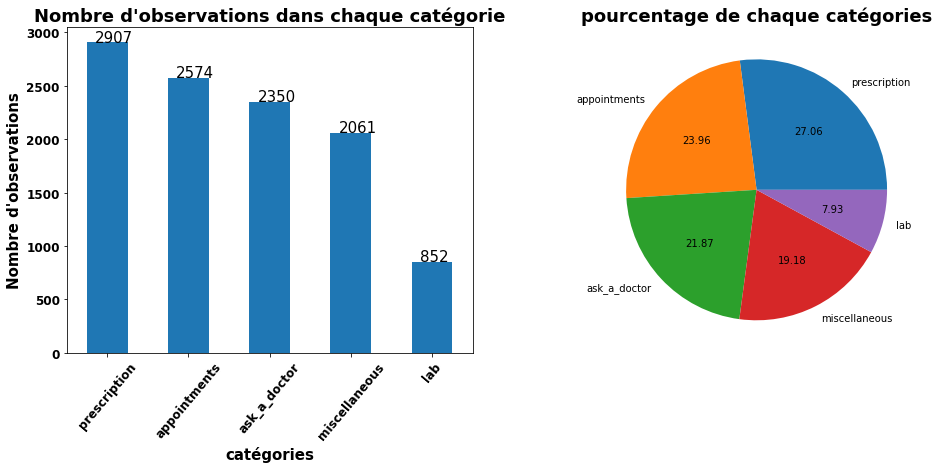

In [16]:
plt.subplots(1,2, figsize=(16,6))

# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = data['categories'].value_counts().plot(kind='bar')
plt.xlabel('catégories', fontsize=15, fontweight='bold')
plt.xticks(rotation=50, fontsize=12, fontweight='bold')
plt.ylabel("Nombre d'observations", fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Nombre d'observations dans chaque catégorie", fontsize=18, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

# pie chart to visualize the percentage distribution of each class
plt.subplot(1,2,2)
plt.pie(data['categories'].value_counts(), labels=['prescription', 'appointments', 'ask_a_doctor', 'miscellaneous',
       'lab'], autopct='%.2f')
plt.title('pourcentage de chaque catégories', fontsize=18, fontweight='bold')

# display plot
plt.show()

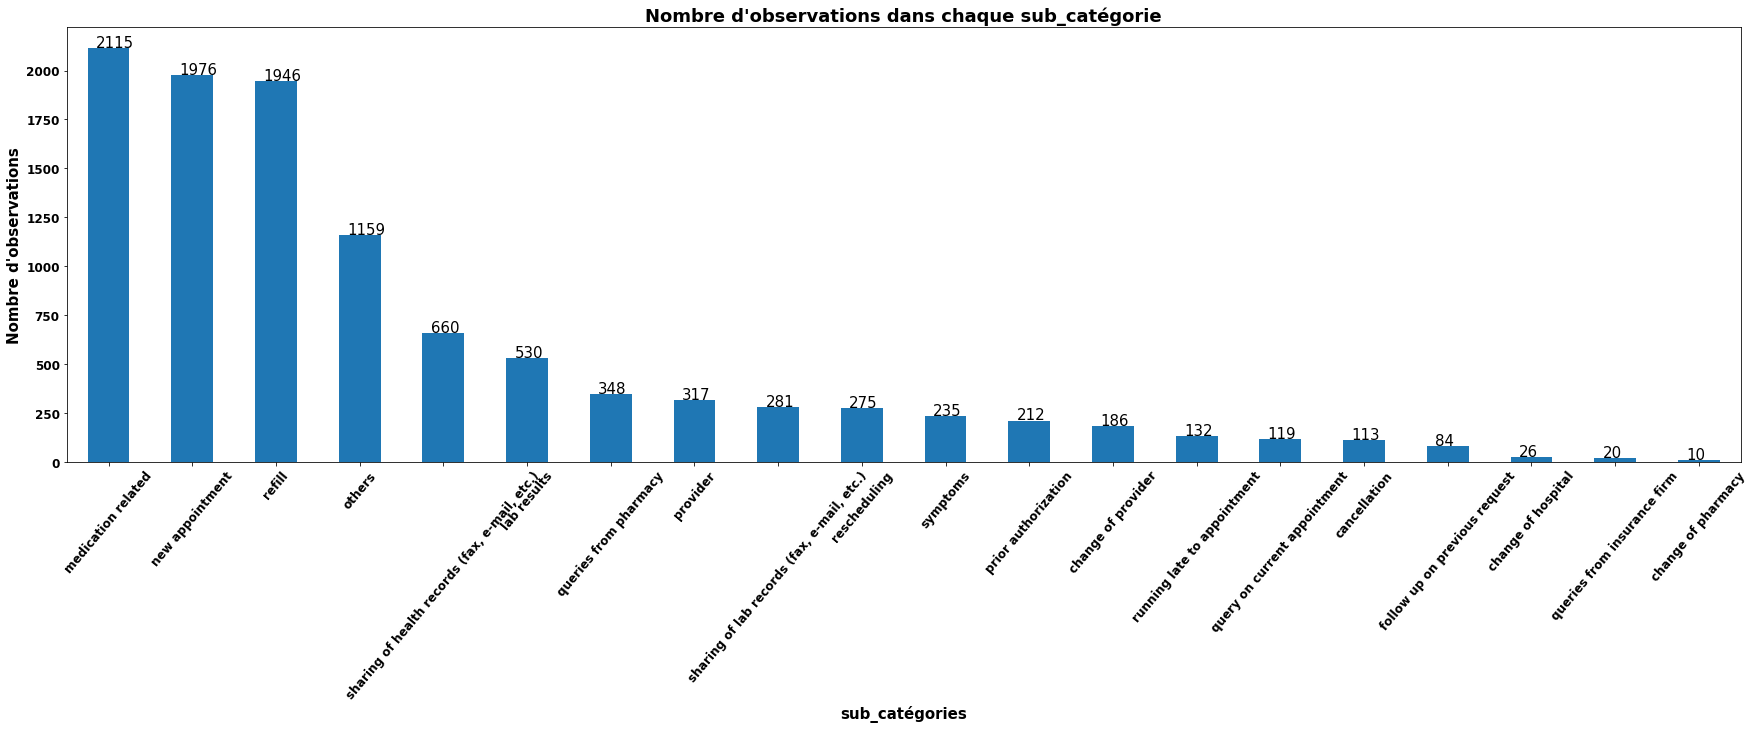

In [17]:
plt.subplots(figsize=(30,8))
# countplot to visualize the no. of observations under each class
ax = data['sub_categories'].value_counts().plot(kind='bar')
plt.xlabel('sub_catégories', fontsize=15, fontweight='bold')
plt.xticks(rotation=50, fontsize=12, fontweight='bold')
plt.ylabel("Nombre d'observations", fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Nombre d'observations dans chaque sub_catégorie", fontsize=18, fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

# display plot
plt.show()

Text(0.5, 1.0, 'pourcentage de chaque sub_catégories')

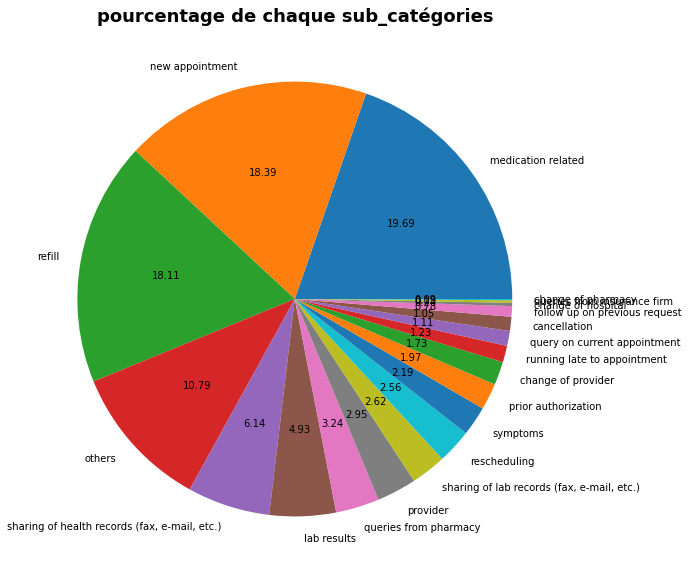

In [18]:
plt.subplots(figsize=(30,10))
# pie chart to visualize the percentage distribution of each class
plt.pie(data['sub_categories'].value_counts(), labels=['medication related', 'new appointment','refill','others',
                                                       'sharing of health records (fax, e-mail, etc.)','lab results',
                                                       'queries from pharmacy','provider','sharing of lab records (fax, e-mail, etc.)',
                                                       'rescheduling','symptoms','prior authorization','change of provider',
                                                       'running late to appointment','query on current appointment',
                                                       'cancellation','follow up on previous request','change of hospital',
                                                       'queries from insurance firm','change of pharmacy'], autopct='%.2f')
plt.title('pourcentage de chaque sub_catégories', fontsize=18, fontweight='bold')

h. Trouver les mots fréquents et tracer l'histogramme en fonction du nombre de mots dans
chaque catégorie.

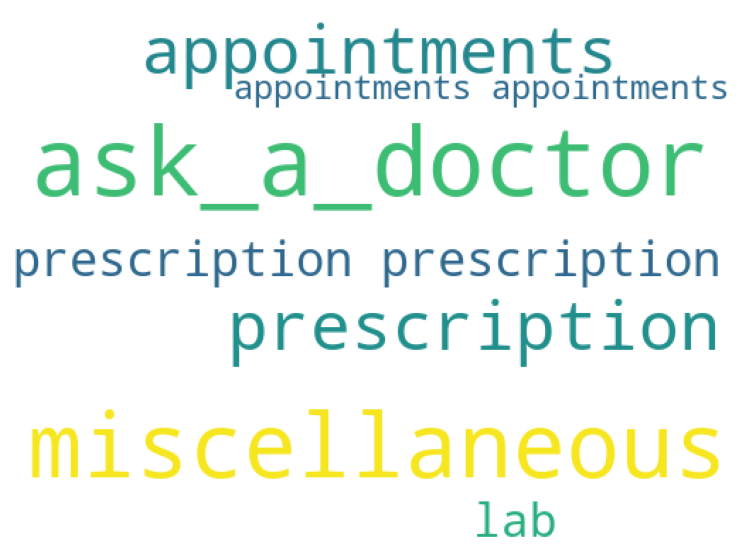

In [19]:
from wordcloud import WordCloud
from scipy import signal

cities = data.categories.dropna(False)
plt.subplots(figsize=(20,10))

wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

(0.0, 2910.0)

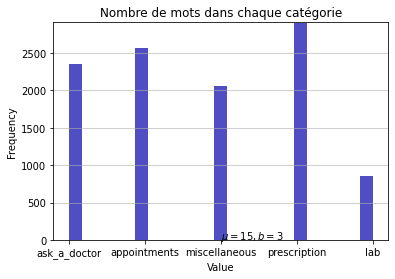

In [20]:

n, bins, patches = plt.hist(x=cities, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=2)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Nombre de mots dans chaque catégorie')
plt.text(2, 4, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

i. Prétraiter le texte ‘SUMMARY’ en supprimant les chiffres, les ponctuations, les espaces, les mots vides, en les transformant en minuscules et en racinant le document (lemmes)

In [21]:
data.columns

Index(['SUMMARY', 'categories', 'sub_categories', 'previous_appointment',
       'ID'],
      dtype='object')

In [22]:
data['SUMMARY']

0              dizzy & double vision past 45 mins after CT
1                       pt clld to check on a work in appt
2                                                SCHEDULED
3                         Last office note faxed to NCEENT
4                             PCP Call - pt had concussion
                               ...                        
11456           pt's wife clld to spk with the RN about PT
11457    Phone Note-Jazz 14-002 Narcolepsy research stu...
11458                                      Judy from Xyrem
11459                   ADD ON w Holly for 05/13 @ 2:30 PM
11460         status of FMLA form?- awaiting MD completion
Name: SUMMARY, Length: 10744, dtype: object

In [23]:
string = data['SUMMARY'][0]#"ADD ON w Holly for 05/13 @ 2:30 PM"

In [24]:
stopW=stopwords.words("english")

In [25]:
def global_clean(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    print(tokens)
    return tokens

In [26]:
global_clean(string)

['dizzy', 'double', 'vision', 'past', 'mins', 'after', 'ct']


['dizzy', 'double', 'vision', 'past', 'mins', 'after', 'ct']

In [27]:
data["SUMMARY_V"]=data["SUMMARY"].apply(lambda x: global_clean(x) )

['dizzy', 'double', 'vision', 'past', 'mins', 'after', 'ct']
['pt', 'clld', 'to', 'check', 'on', 'a', 'work', 'in', 'appt']
['scheduled']
['last', 'office', 'note', 'faxed', 'to', 'nceent']
['pcp', 'call', 'pt', 'had', 'concussion']
['rx', 'refill', 'request']
['nancy', 'from', 'new', 'hanover', 'hospital']
['intuniv', 'rx']
['mri', 'order', 'question']
['condition', 'update']
['pt', 'cancelled', 'her', 'sleep', 'study']
['dizziness', 'ent', 'appointment']
['mri', 'results']
['phone', 'note', 'seizure']
['headache', 'nausea', 'since', 'acetazolamide', 'decreased', 'to', 'day']
['rx', 'refill', 'dexedrine', 'get', 'rx', 'from', 'stk', 'and', 'print', 'two', 'more', 'friday']
['mri', 'sedation']
['sleep', 'rov', 'scheduled']
['new', 'sxs', 'w', 'migraines', 'eyes', 'swelling', 'shut']
['bupap', 'dose', 'change', 'rx', 'amended', 'called', 'to', 'rex']
['imetrix', 'not', 'helping', 'started', 'new', 'meds']
['needs', 'rov', 'for', 'refills', 'message', 'sent', 'to', 'schedulers']
['discus

['new', 'hydrocodone', 'rx', 's', 'to', 'the', 'rna', 'pharmacy']
['mom', 'calling', 'for', 'results']
['rx', 's', 'to', 'rehab', 'facility', 'comtan', 'decrese', 'seroquel', 'd', 'c', 'risperdal']
['update', 'after', 'stopping', 'tpm']
['triage']
['regarding', 'last', 'injection']
['pt', 'wants', 'to', 'discuss', 'his', 'options']
['rx', 'refill', 'request', 'quillivant']
['pt', 'has', 'questions', 'about', 'her', 'rx', 'dosage']
['pt', 'would', 'like', 'to', 'r', 's', 'his', 'ncs']
['phone', 'note']
['phone', 'note']
['lvm', 'to', 'schedule', 'earlier', 'f', 'u', 'appt']
['sch', 'yr', 'rov']
['ctt', 'kirk']
['pt', 'states', 'will', 'be', 'mins', 'late', 'patient', 'advised']
['vyvanse']
['refill', 'and', 'med', 'change', 'request']
['pt', 's', 'son', 'called', 'with', 'an', 'update', 'on', 'his', 'dad']
['late']
['records', 'request', 'from', 'dr', 'troy', 's', 'office']
['med', 'alert', 'bracelet']
['rx', 'refill', 'request']
['please', 'contact', 'patient', 'to', 'schedule', 'mris'

['phone', 'note', 'psychologial', 'report']
['lana', 'from', 'caremark', 'tecfidera', 'team']
['pharmacy', 'rep', 'clld', 'to', 'clarify', 'rx', 'for', 'tecfidera']
['pt', 'headaches', 'are', 'better', 'appt', 'sch', 'in', 'march']
['nd', 'call', 'wcb', 'for', 'headache', 'question']
['appt', 'no', 'longer', 'needed']
['group', 'home', 'clld', 'to', 'report', 'seizure', 'activity']
['rx', 'tenex', 'methylphenidate', 'abilify', 'requests']
['fyi', 'pt', 'status']
['methylphenidate', 'refill', 'grandfather', 'waiting']
['add', 'on', 'tin', 'a', 'm']
['pt', 'needs', 'some', 'advice']
['lab', 'oders']
['med', 'questions', 'appt', 'made']
['please', 'advise', 'back', 'to', 'amanda']
['pm', 'rov', 'durham', 'office', 'white', 'pa', 'c', 'susannah']
['ms', 'contin', 'and', 'oxycodone', 'rx', 'to', 'rna', 'pharm', 'out', 'of', 'both', 'meds']
['mva', 'dx', 'with', 'concussion', 'iov', 'needed']
['please', 'call', 'cell', 'to', 'schedule', 'a', 'work', 'in', 'with', 'kmc']
['mom', 'has', 'quest

['headache', 'injections']
['patient', 'called', 'to', 'discuss', 'his', 'seizure', 'regimen']
['pt', 'req', 's', 'a', 'ret', 'call', 'to', 'discuss', 'sleep', 'equipment', 'order', 'pls', 'rc']
['phone', 'note']
['sch', 'mo', 'rov']
['rx', 'adderall', 'requests']
['records', 'request']
['tpi', 'p', 'w', 'holly']
['phone', 'note']
['refill', 'percocet', 'pick', 'up', 'and', 'fill', 'rna', 'mp']
['rx', 'refill', 'request']
['oxycodone', 'rx', 'fill', 'at', 'rna']
['rx', 'refill', 'request']
['rxrf', 'fioricet']
['rx', 'date', 'change', 'request', 'methadone', 'to']
['rov', 'smf', 'pm']
['rx', 'refill', 'adderall']
['refill', 'focalin', 'xr', 'denied']
['adderall', 'xr', 'prior', 'auth']
['rx', 'refill', 'request']
['mri', 'prior', 'information']
['phone', 'call', 'regarding', 'opioid', 'genotyping']
['phone', 'note']
['numbness', 'in', 'face', 'arm', 'and', 'leg']
['eeg', 'results']
['discuss', 'medication', 'and', 'poss', 'change']
['crabtree', 'chiro', 'clld', 'and', 'states', 'that',

['office', 'notes', 'faxed']
['refill', 'req', 'on', 'medication']
['requesting', 'rx']
['nuvigil', 'rx']
['pt', 's', 'mom', 'called', 'to', 'request', 'eeg']
['eeg', 'result']
['add', 'on', 'ginger']
['need', 'ot', 'pt', 'order', 'if', 'still', 'needed', 'wmc', 'discharge', 'ordered']
['pediatric', 'orthopedist']
['st', 'wcb', 're', 'mri', 'question']
['mirapex', 'rx', 'pt', 'restarted', 'this', 'med', 'talk', 'with', 'stk', 'call', 'pt', 'back']
['cvs', 'pharm', 'rx', 'foltx', 'hard', 'copy', 'request', 'refaxed']
['est', 'pt', 'id', 'with', 'susannah']
['appt', 'set']
['discuss', 'rx', 's']
['triangle', 'neuropsychology', 'requesting', 'additional', 'records']
['rx', 'dosage', 'increase']
['head', 'sxs']
['phone', 'call']
['pt', 'called', 'to', 'check', 'on', 'the', 'status', 'of', 'rx', 'for', 'hydrocodone']
['add', 'on']
['rx', 'lexapro', 'request']
['updated', 'paperwork', 'request']
['diastat', 'rx']
['pt', 'has', 'two', 'no', 'shows']
['rx', 'klonopin']
['they', 'are', 'droppin

['rov']
['pt', 'wants', 'to', 'know', 'status', 'of', 'gilenya', 'pa']
['sch', 'mo', 'rov']
['cambia', 'samples', 'given']
['rov', 'today', 'pm', 'klh']
['pt', 'clld', 'to', 'give', 'an', 'update', 'on', 'betaseron']
['eeg', 'results', 'copied', 'to', 'disc']
['mom', 'says', 'she', 'put', 'in', 'a', 'request', 'with', 'cvs', 'for', 'rx', 'but', 'so', 'far', 'nothing']
['nd', 'call', 're', 'fmla']
['pt', 'us', 'disruptive', 'in', 'class', 'acting', 'out', 'not', 'following', 'directions']
['pt', 'grandmother', 'retuning', 'call']
['pt', 'clld', 'to', 'spk', 'with', 'the', 'rn', 'about', 'pain', 'in', 'pt', 's', 'hands']
['records', 'request']
['phone', 'note']
['need', 'plan', 'of', 'care', 'faxed', 'back']
['pt', 'calling', 'for', 'mri', 'test', 'results', 'pls', 'advise', 'mp']
['rn', 'clld', 'to', 'request', 'ov', 'notes']
['lov', 'rov', 'rx', 'keppra']
['givre', 'appt']
['seizures']
['spouse', 'called', 'to', 'state', 'patient', 'passed', 'away']
['discuss', 'sleep', 'study', 'appt'

['need', 'new', 'wake', 'med', 'pt', 'order']
['needs', 'new', 'patient', 'appt', 'with', 'p', 'carnes']
['found', 'pharmacy', 'in', 'florida', 'that', 'will', 'take', 'her', 'rxs']
['name']
['clonazepam', 'day', 'supply', 'called', 'in']
['rx', 'for', 'oxycodone']
['eeg', 'order', 'appt']
['work', 'in', 'request', 'for', 'eeg', 'results']
['rx', 'refill', 'requests', 'hydrocodone', 'and', 'tramadol']
['bcbs']
['patient', 'needing', 'a', 'doctor', 's', 'note', 'to', 'take', 'an', 'exercise', 'class']
['pt', 'advises', 'feeling', 'faint', 'and', 'pale', 'after', 'iv', 'treatment', 'on']
['urgent', 'order', 'needed', 'before', 'noon']
['pt', 'clld', 'abt', 'continued', 'ha', 's']
['clarification', 'on', 'quantity', 'dose', 'package', 'of', 'prednisone']
['drug', 'interaction']
['hydrocodone', 'rx', 'built']
['eye', 'problem']
['phone', 'note']
['hydrocodone', 'rx', 'pick', 'up', 'paper', 'rx']
['surgery']
['vitamin', 'd', 'rxrf']
['request', 'for', 'np', 'forms']
['trileptal', 'rx', 'and

['scheduled']
['needs', 'sleep', 'study']
['pharmacy', 'pa']
['cant', 'contact', 'letter', 'mailed']
['running', 'late']
['wants', 'to', 'speak', 'with', 'rn', 'about', 'pt', 's', 'headaches', 'and', 'backaches']
['lvmtcb', 'to', 'confirm', 'appt']
['she', 's', 'wanting', 'to', 'possibly', 'increase', 'her', 'rx', 'dosage', 'ov', 'scheduled']
['next', 'steps', 'in', 'poc']
['pt', 'calling', 'for', 'recent', 'mri', 'test', 'results', 'mp']
['docementaion', 'for', 'innovations', 'waiver']
['requesting', 'referral', 'to', 'wilmington', 'neurologist']
['follow', 'up', 'unable', 'to', 'contact']
['md', 'change', 'request']
['add', 'on', 'for', 'ppc']
['please', 'resend', 'portal', 'invite']
['spoke', 'to', 'dad', 'he', 'will', 'cb', 'on', 'to', 'sch', 'f', 'u']
['note', 'stating', 'sleep', 'study', 'done', 'lmtcb']
['fyi', 'szx', 'rov', 'w', 'kmc', 'on']
['seizure', 'update']
['checking', 'status', 'of', 'dme', 'and', 'mask']
['change', 'dme']
['phone', 'note']
['phone', 'note']
['duke', 'r

['early', 'refil', 'of', 'gabapentin', 'pt', 'returning', 'nurse', 'call']
['pt', 'would', 'like', 'bone', 'scan', 'results']
['l', 'side', 'of', 'head', 'tingling', 'heavy', 'feeling', 'please', 'advise']
['pt', 'is', 'out', 'of', 'medication', 'please', 'forward', 'back', 'today']
['pt', 'calling', 'to', 'confirm', 'arrival', 'time', 'for', 'procedure', 'on', 'mp']
['please', 'ret', 'call', 'to', 'pt']
['hydrocodone', 'rx']
['needs', 'appt', 'for', 'refills']
['phone', 'note']
['rx', 'refill', 'request']
['patient', 'will', 'pick', 'up', 'records']
['attorney', 'need', 'affidavit']
['phone', 'note']
['neurontin', 'mg', 'rx', 'refill']
['tysabri', 'orders', 'needs', 'to', 'be', 'sent']
['botox']
['vyvanse', 'rx']
['pt', 'referral']
['fyi', 'surgery', 'sched']
['scheduled']
['provigil', 'brand', 'or', 'generic', 'approved']
['rx', 'amitriptyline', 'at', 'pharmacy', 'already']
['fu', 'appt', 'question']
['ampyra', 'rx']
['refill', 'rx', 'as', 'per', 'dr', 'kirk']
['rx', 'request', 'zolo

In [28]:
data["SUMMARY_V"]

0           [dizzy, double, vision, past, mins, after, ct]
1             [pt, clld, to, check, on, a, work, in, appt]
2                                              [scheduled]
3                  [last, office, note, faxed, to, nceent]
4                         [pcp, call, pt, had, concussion]
                               ...                        
11456    [pt, s, wife, clld, to, spk, with, the, rn, ab...
11457    [phone, note, jazz, narcolepsy, research, stud...
11458                                  [judy, from, xyrem]
11459                         [add, on, w, holly, for, pm]
11460    [status, of, fmla, form, awaiting, md, complet...
Name: SUMMARY_V, Length: 10744, dtype: object

j. Utiliser les poids TF-IDF et construire la matrice document terme.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(analyzer=global_clean)
vector_f = vector.fit_transform(data['SUMMARY'])

['dizzy', 'double', 'vision', 'past', 'mins', 'after', 'ct']
['pt', 'clld', 'to', 'check', 'on', 'a', 'work', 'in', 'appt']
['scheduled']
['last', 'office', 'note', 'faxed', 'to', 'nceent']
['pcp', 'call', 'pt', 'had', 'concussion']
['rx', 'refill', 'request']
['nancy', 'from', 'new', 'hanover', 'hospital']
['intuniv', 'rx']
['mri', 'order', 'question']
['condition', 'update']
['pt', 'cancelled', 'her', 'sleep', 'study']
['dizziness', 'ent', 'appointment']
['mri', 'results']
['phone', 'note', 'seizure']
['headache', 'nausea', 'since', 'acetazolamide', 'decreased', 'to', 'day']
['rx', 'refill', 'dexedrine', 'get', 'rx', 'from', 'stk', 'and', 'print', 'two', 'more', 'friday']
['mri', 'sedation']
['sleep', 'rov', 'scheduled']
['new', 'sxs', 'w', 'migraines', 'eyes', 'swelling', 'shut']
['bupap', 'dose', 'change', 'rx', 'amended', 'called', 'to', 'rex']
['imetrix', 'not', 'helping', 'started', 'new', 'meds']
['needs', 'rov', 'for', 'refills', 'message', 'sent', 'to', 'schedulers']
['discus

['old', 'pt', 'new', 'problem']
['office', 'clld', 'to', 'request', 'clearance', 'for', 'sports']
['rx', 'new', 'request', 'for', 'cambia']
['ref', 'to', 'rex', 'health', 'care']
['pm', 'sleep', 'patient', 'follow', 'up', 'rna', 'mauldin', 'pa']
['pt', 'discharged', 'from', 'hospital', 'on', 'haldol', 'and', 'seroquel']
['phone', 'note']
['continued', 'has', 'and', 'requesting', 'meds']
['pharmacist', 'says', 'they', 'have', 'an', 'unsigned', 'script', 'for', 'clonazepam']
['n', 'referral', 'for', 'a', 'neurologist', 'provider', 'in', 'steamboat', 'springs', 'co']
['appt', 'scheduled', 'with', 'dr', 'hull', 'for', 'tonight']
['namenda', 'not', 'covered']
['pt', 'wants', 'mri', 'results', 'to', 'be', 'expedited', 'because', 'she', 'has', 'to', 'see', 'her']
['botox', 'appt', 'with', 'rwg']
['please', 'call', 'mom', 'to', 'r', 's', 'appt', 'that', 'was', 'cancelled', 'due', 'to', 'weather']
['rx', 'refill']
['tysbari', 'after', 'surgery', 'pls', 'advise']
['namenda', 'request']
['caremar

['lamictal', 'level']
['dr', 'shah', 'called']
['pt', 's', 'mom', 'returned', 'rn', 'phone', 'cal']
['email', 'about', 'medication']
['pt', 'clld', 'to', 'request', 'an', 'update', 'on', 'pt', 's', 'rx', 'for', 'lamictal']
['foot', 'question']
['iov', 'sheaffer', 'at', 'am']
['rite', 'aide', 'needs', 'to', 'know', 'maximum', 'maxalt', 'pt', 'can', 'take']
['mom', 'has', 'questions', 'about', 'sleep', 'study', 'tonight']
['intniv', 'not', 'approved']
['call', 'wcb', 'fr', 'mom', 're', 'rx', 'status', 'pt', 'is', 'out']
['refill', 'trazodone', 'ambien', 'wal', 'mart', 'wf', 'to', 'fill', 'mp']
['pt', 'requests', 'change', 'to', 'mri', 'order']
['referring', 'physician', 'requesting', 'ncs']
['please', 'call', 'or', 'send', 'through', 'p']
['unable', 'to', 'open', 'mri', 'disk']
['pts', 'mom', 'returned', 'call']
['pt', 'would', 'like', 'meds', 'for', 'claustrophobia', 'please', 'call']
['mri', 'results']
['pt', 'went', 'to', 'pick', 'up', 'meds', 'at', 'walgreens', 'pharmacy', 'told', 'n

['refill', 'lamotrigine', 'er', 'mg', 'wal', 'mart', 'to', 'fill']
['mri', 'cs', 'bcbs', 'no', 'auth', 'req']
['pt', 'clld', 'with', 'side', 'effects']
['mom', 'req', 'keppra', 'mailed', 'to', 'home', 'address']
['lvm', 'to', 'cb', 'referral', 'to', 'dr', 'milowic', 'by', 'dr', 'sheaffer']
['lmtcb', 'and', 'schedule', 'with', 'gina', 'for', 'add', 'l', 'refills']
['rx', 'refill', 'needs', 'today']
['rxs', 'oxycodone']
['mom', 'has', 'question', 'about', 'pt', 's', 'rx', 'and', 'other', 'related', 'questions']
['soma', 'and', 'norco', 'hard', 'copy']
['phone', 'note']
['mom', 'advises', 'pt', 'had', 'another', 'sz', 'w', 'nose', 'bleeds', 'lasted', 'approx', 'm']
['mir', 'request']
['tenex', 'rxn', 'pa', 'done', 'for', 'intuniv']
['pt', 'had', 'sz', 'today', 'would', 'like', 'to', 'discuss', 'chagning', 'medication', 'mp']
['on', 'call', 'loose', 'stools']
['order', 'labs', 'for', 'pcp']
['faxed', 'order', 'to']
['est', 'pt', 'id', 'with', 'jdw']
['l', 'm', 'for', 'mom', 'to', 'cb', 'to

['rx', 'refill', 'adderall']
['refill', 'focalin', 'xr', 'denied']
['adderall', 'xr', 'prior', 'auth']
['rx', 'refill', 'request']
['mri', 'prior', 'information']
['phone', 'call', 'regarding', 'opioid', 'genotyping']
['phone', 'note']
['numbness', 'in', 'face', 'arm', 'and', 'leg']
['eeg', 'results']
['discuss', 'medication', 'and', 'poss', 'change']
['crabtree', 'chiro', 'clld', 'and', 'states', 'that', 'they', 'dont', 'have', 'pt']
['mcr', 'bcbs', 'no', 'auth', 'req']
['rn', 'placed', 'order', 'for', 'relpax', 'for', 'pt']
['pharmacy', 'needs', 'medication', 'clarification']
['lvmtcb', 'to', 'confirm', 'appt']
['increase', 'vpa', 'is', 'this', 'ok']
['doctors', 'note', 'request']
['rytary', 'rx']
['awaiting', 'call', 'back', 'tecfidera', 'rx', 'today', 'before', 'pm']
['r', 'labs', 'to', 'be', 'posted', 'to', 'her', 'portal']
['pt', 'says', 'she', 'is', 'having', 'numbness', 'in', 'lips', 'and', 'left', 'arm', 'pt', 'wants', 'to']
['requesting', 'a', 'work', 'in']
['faxed', 'emg', '

['phone', 'note']
['need', 'lamictal', 'order', 'on', 'monday']
['mri', 'meds', 'for', 'tomorrow']
['not', 'able', 'to', 'schedule', 'sleep', 'study', 'now', 'due', 'family', 'illness']
['zomig', 'and', 'frova', 'samples']
['provigil', 'rx']
['pt', 'passed', 'away', 'nov']
['gabapentin', 'side', 'effects', 'discuss', 'other', 'options', 'at', 'f', 'u']
['pain', 'clinic', 'np', 'appt', 'please']
['having', 'headaches', 'offered', 'sooner', 'appt']
['pts', 'mom', 'states', 'the', 'pt', 'had', 'a', 'min', 'seizure']
['mri']
['mom', 'would', 'like', 'to', 'discuss', 'eeg', 'findings', 'and', 'referral']
['walgreens', 'pharm', 'new', 'rx', 'carb', 'levo', 'request', 'pt', 'out', 'of', 'meds']
['advise', 'on', 'proceeding', 'with', 'mri', 'see', 'ov', 'note']
['rash', 'poss', 'reaction']
['letter', 'sent', 'to', 'patient', 'through', 'the', 'portal']
['est', 'pt', 'w', 'hull', 'recds', 'in', 'npf']
['nd', 'cb', 'rx', 'restoril', 'request', 'to', 'increase']
['pt', 'clld', 'with', 'questions'

['pt', 'wants', 'to', 'be', 'seen', 'right', 'away', 'with', 'klh', 'but', 'order', 'says', 'in']
['sch', 'mo', 'rov']
['pharmacy', 'wants', 'pa', 'to', 'change', 'to', 'generic']
['rx', 'refill', 'request', 'hydrocodone']
['raleigh', 'cardiology', 'clld', 'to', 'rquest', 'sleep', 'study', 'results']
['discuss', 'pain', 'and', 'poss', 'increase', 'in', 'med']
['pt', 'is', 'to', 'start', 'to', 'work', 'this', 'afternoon', 'at', 'pm', 'please', 'fill', 'out']
['pt', 'would', 'like', 'cb']
['pt', 'calling', 'back', 're', 'status', 'of', 'script', 'for', 'the', 'stair', 'lift']
['phone', 'call', 're', 'headaches']
['form', 'for', 'school']
['pt', 'ret', 'call', 'ritalin', 'rx']
['wcb', 'rep', 'clld', 'to', 'spk', 'with', 'the', 'rn', 'about', 'pt', 's', 'testing']
['post', 'procedure', 'questions']
['lmvm', 'appt', 'for']
['new', 'patient', 'paperwork', 'received']
['uhc', 'hmo', 'authorization', 'in', 'progress']
['phone', 'note', 'from', 'sister', 'not', 'on', 'hippa']
['meds', 'refill',

['pt', 'is', 'at', 'rex', 'on', 'dialysis', 'pls', 'advise']
['mri', 'order']
['increase', 'keppra']
['will', 'mail', 'medical', 'records', 'release', 'to', 'home', 'address']
['please', 'advise', 'namenda', 'advise']
['phenytoin', 'rx', 'next', 'rov']
['uhc', 'rep', 'clld', 'to', 'give', 'approval', 'of', 'topamax']
['concerns', 'about', 'lamictal']
['appt', 'info', 'fyi']
['clonazepam', 'refill', 'request']
['pls', 'write', 'referral', 'for', 'botox']
['print', 'and', 'sign', 'rx']
['rx', 'refill', 'request', 'oxycodone', 'ms', 'contin']
['copaxone', 'rx']
['depakote', 'sprinkles', 'day', 'refill']
['parent', 's', 'concerns', 'about', 'mri']
['pharmacy', 'clld', 'to', 'request', 'further', 'info', 'for', 'rx', 'trokendi']
['pt', 'clld', 'to', 'request', 'orders', 'or', 'rx', 'for', 'an', 'electric', 'wheelchair']
['mri', 's', 'spine', 'dr', 'bullard']
['order', 'cpap', 'set', 'up', 'pt', 'has', 'machine']
['cpap', 'rx', 'for', 'new', 'machine']
['rx', 'increase']
['pls', 'create', 'd

['pt', 'calling', 'to', 'schedule', 'sleep', 'study', 'mp']
['np', 'appt', 'scheduled', 'july', 'w', 'dr', 'naslund']
['np', 'appt', 'w', 'kirk', 'recds', 'in', 'npf']
['am', 'dtr', 'ret', 'call', 'ncs', 'emg', 'not', 'sure', 'l', 'or', 'r', 'hand']
['valium', 'rx']
['add', 'on', 'np', 'am', 'gabr']
['scheduled']
['add', 'on', 'ppc']
['pt', 'would', 'like', 'mri', 'results']
['np', 'appt']
['please', 'pull', 'records', 'drop', 'in', 'chart', 'pls', 'update', 'medicare']
['appt', 'scheduled']
['md', 'advice', 'letter', 'for', 'pt', 's', 'employer']
['scheduled']
['rxbetaseron', 'refaxed']
['prednisone', 'try', 'it', 'again']
['duke', 'oncology', 'hematology', 'requesting', 'records']
['sooner', 'appt', 'for', 'ambularoty', 'eeg']
['lvmtcb', 'to', 'confirm', 'appt', 'on']
['unc', 'will', 'contact', 'pt', 'to', 'schedule', 'this', 'appt']
['lvmtcb', 'to', 'confirm', 'appt', 'on']
['mom', 'wants', 'to', 'speak', 'with', 'rn', 'md', 'about', 'a', 'transport', 'wheelchair', 'as', 'so']
['sch

['late']
['phone', 'note']
['pt', 'needs', 'referral', 'to', 'infectious', 'disease']
['medication', 'not', 'working']
['pt', 'called', 'us', 'back', 'but', 'we', 're', 'not', 'sure', 'who', 'called', 'nor', 'why', 'no', 'note']
['please', 'return', 'call', 'to', 'rex', 'home', 'services']
['hydrocodone', 'refill', 'request']
['hydrocodone', 'rx', 'refill']
['add', 'on', 'procedure', 'for']
['rx', 'request', 'for', 'electric', 'wheelchair', 'repair']
['pt', 'may', 'contact', 'roi', 'for', 'records', 'if', 'he', 'choosed', 'to', 'do', 'so']
['patient', 'wants', 'to', 'pick', 'up', 'mri', 'brain', 'cd', 'disks', 'x']
['scheduled']
['ha', 'and', 'maxalt', 'rx']
['anthem', 'bcbs', 'additional', 'info', 'required', 'lmtcb']
['please', 'return', 'mom', 's', 'call', 'about', 'scheduling', 'issue']
['new', 'timing', 'of', 'focalin', 'doses']
['bridges', 'to', 'access']
['fyi']
['triage', 'myasthenia', 'gravis', 'pt', 'flare', 'up', 'nw', 'blood', 'thinner', 'wayfarn']
['welcome', 'message', 't

In [30]:
tfidf_matrix=pd.DataFrame(vector_f.toarray())

k. Quelle est la dimensionnalité de la matrice et supprimer les termes épars (termes avec une valeur maximale de zéro)

In [31]:
tfidf_matrix.shape

(10744, 4016)

In [32]:
tfidf_matrix

,0,1,2,3,4,5,6,7,8,9,...,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.330364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10740,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10741,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10742,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
tfidfT=tfidf_matrix.T

In [34]:
tfidfT

,0,1,2,3,4,5,6,7,8,9,...,10734,10735,10736,10737,10738,10739,10740,10741,10742,10743
0,0.0,0.330364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4012,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4013,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
moy=[]
for i in range(tfidf_matrix.shape[1]):
    moy.append(tfidf_matrix[i].sum())
moy

[122.47375960408814,
 0.36331907648981765,
 0.551735119977673,
 0.4158805963178619,
 1.261570762139182,
 6.793043962975959,
 0.5770310203737788,
 0.8400083937031155,
 4.859069446647776,
 0.36600241133029826,
 0.5648093929484141,
 85.54230493927308,
 0.6519068338139594,
 0.6598424064979201,
 0.4905320371714807,
 0.44577040062146017,
 19.576498497404078,
 0.5993305034862362,
 0.3808405506159246,
 1.0850718154794854,
 0.5617624678854463,
 3.649427483796388,
 2.0645743402831624,
 4.6572204958912415,
 2.130792556734831,
 0.45438441390161943,
 0.4857562891727014,
 0.5015704553521738,
 0.4290222768933073,
 1.6085541301208295,
 0.5329186143282437,
 0.7592174795002313,
 1.5854903841365369,
 0.5035745776175048,
 0.5613846678097958,
 0.6447302089609139,
 0.6701525527112611,
 0.38243212268097093,
 0.5922630684875787,
 1.6548955124773617,
 6.832894250817024,
 0.8107649294894499,
 3.795653939047213,
 3.61462452531354,
 0.4852319521208549,
 7.547064474512263,
 0.6204100698750534,
 0.5655726273744971,

In [36]:
ex=[]
for i in range(tfidf_matrix.shape[1]):
    if np.sum(tfidf_matrix[i].values)>np.mean(moy):
        ex.append(i)

In [37]:
tfidf_matrix.shape

(10744, 4016)

In [38]:
tfidf_red=tfidf_matrix.drop(ex, axis=1)

In [39]:
tfidf_matrix

,0,1,2,3,4,5,6,7,8,9,...,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.330364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10740,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10741,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10742,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
tfidf_red.shape

(10744, 3370)

l. La construction du nuage des mots les plus fréquents en ‘SUMMARY’ dans toutes les
catégories

In [41]:
features=vector.get_feature_names()

In [42]:
featuresExist = [features[k] for k in tfidf_red.columns]

In [43]:
featuresExist

['ab',
 'abby',
 'abbygail',
 'abdominal',
 'abilities',
 'abl',
 'able',
 'abo',
 'abot',
 'above',
 'abr',
 'absence',
 'absent',
 'abuse',
 'abx',
 'ac',
 'acaria',
 'accept',
 'accepts',
 'access',
 'accident',
 'accidentally',
 'accomodate',
 'accomodations',
 'account',
 'accredo',
 'acct',
 'acet',
 'acetaminophen',
 'acetazolamide',
 'ache',
 'aching',
 'achtar',
 'acid',
 'acrredo',
 'acs',
 'acting',
 'action',
 'active',
 'activist',
 'acute',
 'acyclovir',
 'addendum',
 'adderal',
 'adderalll',
 'adding',
 'addition',
 'additonal',
 'addl',
 'addon',
 'addressed',
 'addtional',
 'adhd',
 'adivse',
 'adjust',
 'adjusted',
 'adjustment',
 'adjustments',
 'administration',
 'admission',
 'admisson',
 'admit',
 'admits',
 'admittance',
 'admitted',
 'admtiting',
 'adult',
 'adv',
 'advance',
 'advanced',
 'adverse',
 'advice',
 'advil',
 'advis',
 'advisefor',
 'advisehead',
 'advising',
 'advisment',
 'ae',
 'aeds',
 'aes',
 'aetna',
 'af',
 'affidavit',
 'afford',
 'aflac',
 

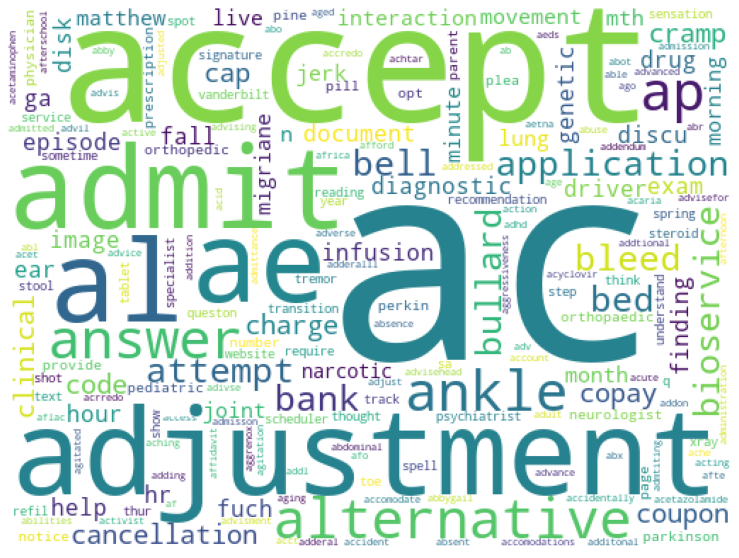

In [44]:
plt.subplots(figsize=(20,10))

wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(featuresExist))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

m. Diviser les données en train et teste

In [45]:
target = LabelEncoder().fit_transform(data['categories'])

data_features = tfidf_matrix

X_train,X_test,y_train,y_test=train_test_split(data_features,target,test_size=0.3)

n. Utiliser la régression logistique pour construire le modèle de classification.

In [46]:
from sklearn.linear_model import LogisticRegression

#modele=LogisticRegression(penalty='none',solver='newton-cg')
modele=LogisticRegression()
modele.fit(X_train,y_train)


/home/mouad/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y = modele.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support as precis, classification_report

accuracy_score(y,y_test)

0.7518610421836228

o. Choisir un autre algorithme de catégorisation et construire le nouveau modèle.

In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_randF = classifier.predict(X_test)

In [51]:
accuracy_score(y_randF,y_test)

0.734181141439206

p. Utiliser le modèle de régression pour les données de test et afficher la matrice de confusion.

In [52]:
confusion_matrix(y_randF,y_test)

array([[644,  40,  10,  32,  23],
       [ 74, 509,  20, 103, 108],
       [  4,   8, 165,  13,  14],
       [ 59,  95,  43, 372,  61],
       [  9,  86,  17,  38, 677]])

<AxesSubplot:>

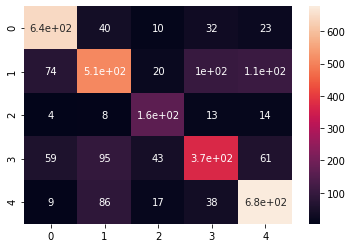

In [53]:
conf = confusion_matrix(y_randF,y_test)
sea.heatmap(conf, annot=True)

In [54]:
precis(y_test,y_randF)

(array([0.85981308, 0.62530713, 0.80882353, 0.59047619, 0.81862152]),
 array([0.81518987, 0.6897019 , 0.64705882, 0.66666667, 0.76670442]),
 array([0.83690708, 0.65592784, 0.71895425, 0.62626263, 0.79181287]),
 array([790, 738, 255, 558, 883]))

In [55]:
print("Random Forest: ")
print(classification_report(y_test, y_randF))
print("Logistic Regression ")
print(classification_report(y_test, y))

Random Forest: 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       790
           1       0.63      0.69      0.66       738
           2       0.81      0.65      0.72       255
           3       0.59      0.67      0.63       558
           4       0.82      0.77      0.79       883

    accuracy                           0.73      3224
   macro avg       0.74      0.72      0.73      3224
weighted avg       0.74      0.73      0.74      3224

Logistic Regression 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       790
           1       0.67      0.71      0.69       738
           2       0.88      0.60      0.71       255
           3       0.60      0.70      0.65       558
           4       0.83      0.81      0.82       883

    accuracy                           0.75      3224
   macro avg       0.77      0.73      0.74      3224
weighted avg       0.76      0.75      0

Proposer en 2 lignes une suggestion qui pourra améliorer les résultats obtenus.

**Reponse** : on peut améliorer les résultats obtenus en utilisant la réduction de la dimension de la matrice en des composantes caractéristiques et l’utilisation des composantes extraites pour améliorer les performances de classification